# **IMPORTING LIBRARIES**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# **IMPORTING DATASET**

In [ ]:
df=pd.read_csv('/content/diwali_sales.csv',encoding='unicode_escape')
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


In [ ]:
df.shape

(11251, 15)

# **EXPLORING DATA AND CLEANING DATA**

In [ ]:
df.isnull().sum()

User_ID                 0
Cust_name               0
Product_ID              0
Gender                  0
Age Group               0
Age                     0
Marital_Status          0
State                   0
Zone                    0
Occupation              0
Product_Category        0
Orders                  0
Amount                 12
Status              11251
unnamed1            11251
dtype: int64

In [ ]:
df.drop(['Status','unnamed1'],axis=1,inplace=True)
df.dropna(inplace=True)

In [ ]:
df.isnull().sum()

User_ID             0
Cust_name           0
Product_ID          0
Gender              0
Age Group           0
Age                 0
Marital_Status      0
State               0
Zone                0
Occupation          0
Product_Category    0
Orders              0
Amount              0
dtype: int64

In [ ]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11239 entries, 0 to 11250
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11239 non-null  int64  
 1   Cust_name         11239 non-null  object 
 2   Product_ID        11239 non-null  object 
 3   Gender            11239 non-null  object 
 4   Age Group         11239 non-null  object 
 5   Age               11239 non-null  int64  
 6   Marital_Status    11239 non-null  int64  
 7   State             11239 non-null  object 
 8   Zone              11239 non-null  object 
 9   Occupation        11239 non-null  object 
 10  Product_Category  11239 non-null  object 
 11  Orders            11239 non-null  int64  
 12  Amount            11239 non-null  float64
dtypes: float64(1), int64(4), object(8)
memory usage: 1.2+ MB


In [ ]:
df.describe()

,User_ID,Age,Marital_Status,Orders,Amount
count,1.123900e+04,11239.000000,11239.000000,11239.000000,11239.000000
mean,1.003004e+06,35.410357,0.420055,2.489634,9453.610858
std,1.716039e+03,12.753866,0.493589,1.114967,5222.355869
min,1.000001e+06,12.000000,0.000000,1.000000,188.000000
25%,1.001492e+06,27.000000,0.000000,2.000000,5443.000000
50%,1.003064e+06,33.000000,0.000000,2.000000,8109.000000
75%,1.004426e+06,43.000000,1.000000,3.000000,12675.000000
max,1.006040e+06,92.000000,1.000000,4.000000,23952.000000


In [ ]:
df.describe(include='object')

,Cust_name,Product_ID,Gender,Age Group,State,Zone,Occupation,Product_Category
count,11239,11239,11239,11239,11239,11239,11239,11239
unique,1250,2350,2,7,16,5,15,18
top,Vishakha,P00265242,F,26-35,Uttar Pradesh,Central,IT Sector,Clothing & Apparel
freq,42,53,7832,4541,1944,4289,1583,2655


In [ ]:
for i in df.describe(include='object').columns:
  print(i)
  print(df[i].unique())
  print('-'*20)

Cust_name
['Sanskriti' 'Kartik' 'Bindu' ... 'Chris' 'Madan Mohan' 'Nicole']
--------------------
Product_ID
['P00125942' 'P00110942' 'P00118542' ... 'P00307142' 'P00044742'
 'P00296942']
--------------------
Gender
['F' 'M']
--------------------
Age Group
['26-35' '0-17' '18-25' '51-55' '46-50' '55+' '36-45']
--------------------
State
['Maharashtra' 'Andhra\xa0Pradesh' 'Uttar Pradesh' 'Karnataka' 'Gujarat'
 'Himachal Pradesh' 'Delhi' 'Jharkhand' 'Kerala' 'Haryana'
 'Madhya Pradesh' 'Bihar' 'Rajasthan' 'Uttarakhand' 'Telangana' 'Punjab']
--------------------
Zone
['Western' 'Southern' 'Central' 'Northern' 'Eastern']
--------------------
Occupation
['Healthcare' 'Govt' 'Automobile' 'Construction' 'Food Processing'
 'Lawyer' 'Media' 'Banking' 'Retail' 'IT Sector' 'Aviation' 'Hospitality'
 'Agriculture' 'Textile' 'Chemical']
--------------------
Product_Category
['Auto' 'Hand & Power Tools' 'Stationery' 'Tupperware' 'Footwear & Shoes'
 'Furniture' 'Food' 'Games & Toys' 'Sports Products' '

In [ ]:
for i in df.columns:
  print(i)
  print('.'*20)
  print(df[i].value_counts())
  print('-'*60)

User_ID
....................
User_ID
1001680    24
1003808    23
1001941    22
1004425    20
1004682    19
           ..
1003755     1
1000143     1
1002307     1
1003671     1
1005258     1
Name: count, Length: 3752, dtype: int64
------------------------------------------------------------
Cust_name
....................
Cust_name
Vishakha       42
Shreyshi       32
Sudevi         30
Akshat         29
Alejandro      28
               ..
Overcash        2
Madan Mohan     2
Madhav          2
Laal            1
Bindu           1
Name: count, Length: 1250, dtype: int64
------------------------------------------------------------
Product_ID
....................
Product_ID
P00265242    53
P00110942    44
P00184942    37
P00237542    35
P00112142    34
             ..
P00257642     1
P00078242     1
P00333542     1
P00206642     1
P00296942     1
Name: count, Length: 2350, dtype: int64
------------------------------------------------------------
Gender
....................
Gender
F    7832
M  

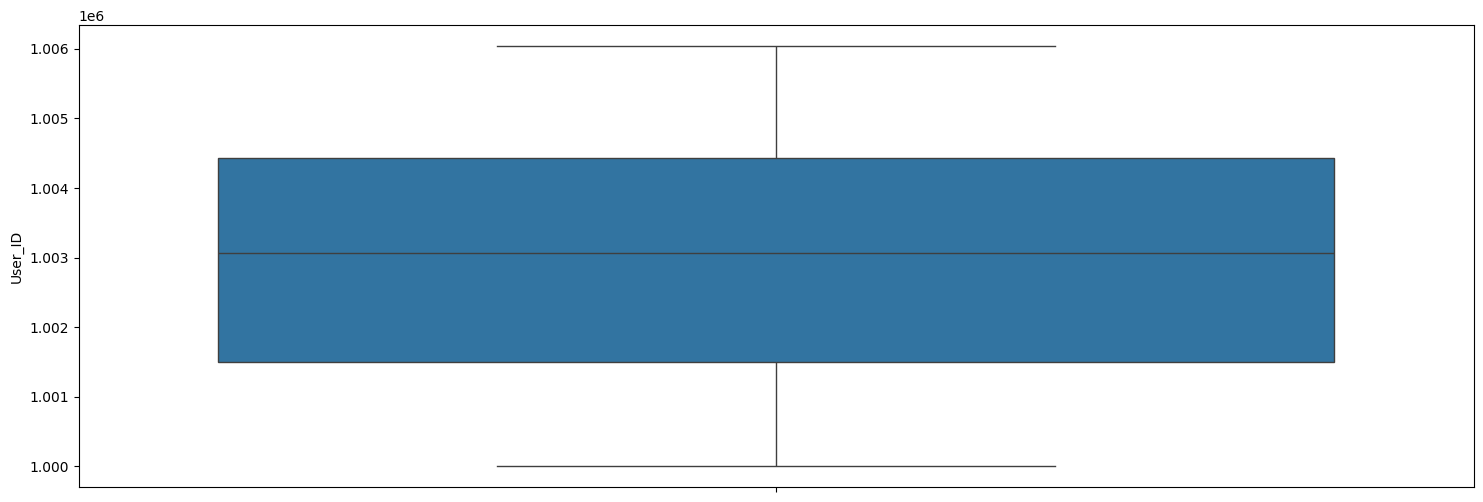

--------------------------------------------------------------------------------


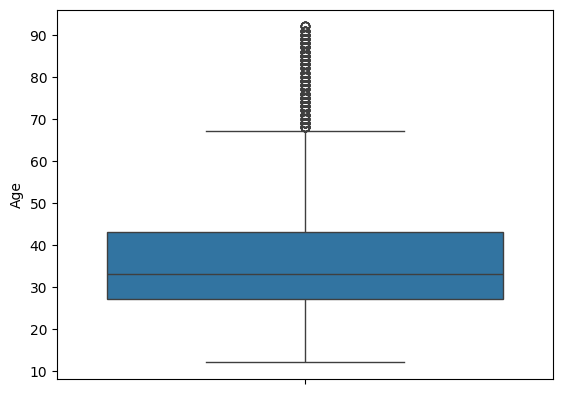

--------------------------------------------------------------------------------


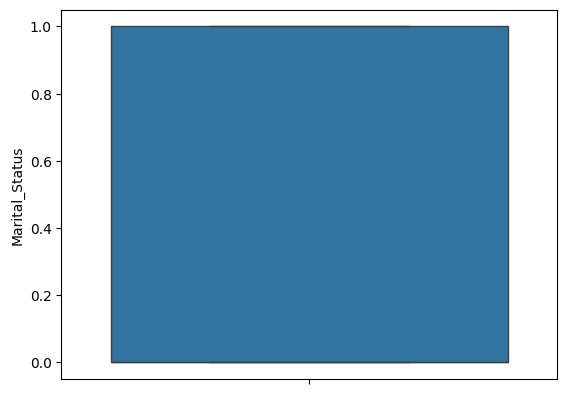

--------------------------------------------------------------------------------


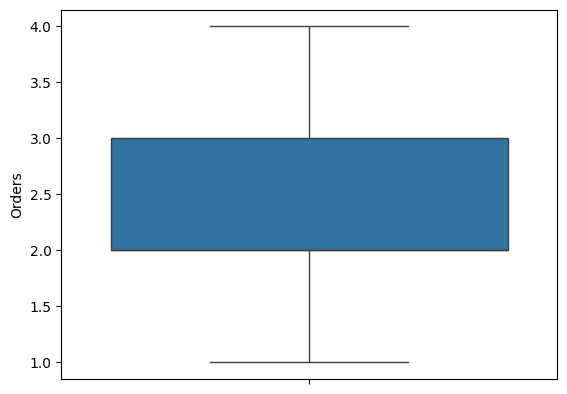

--------------------------------------------------------------------------------


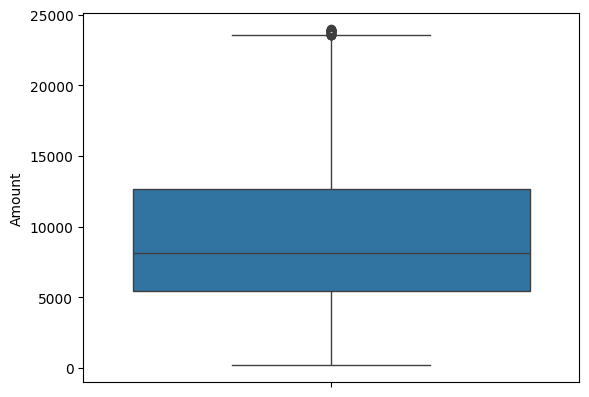

--------------------------------------------------------------------------------


In [ ]:
plt.figure(figsize=(18,6))
for i in df.describe().columns:
  sns.boxplot(df[i])
  plt.show()
  print('-'*80)

# **ANALYSING DATA AND DATA VISUALIZATION**


#age group

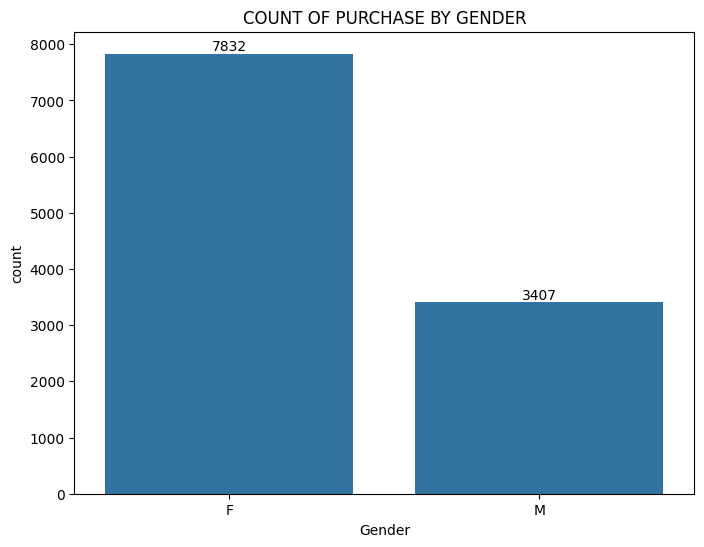

In [ ]:
plt.figure(figsize=(8,6))
ax=sns.countplot(x='Gender',data=df)
for i in ax.containers:
  ax.bar_label(i)
plt.title('COUNT OF PURCHASE BY GENDER')
plt.show()

In [ ]:
sales_gen=df.groupby('Gender')[['Amount']].sum()

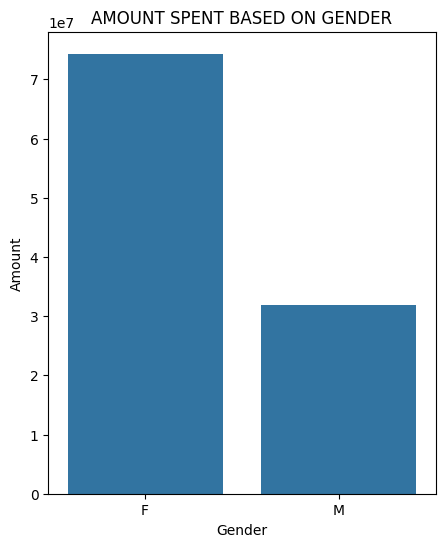

In [ ]:
plt.figure(figsize=(5,6))
sns.barplot(x='Gender',y='Amount',data=sales_gen)
plt.title('AMOUNT SPENT BASED ON GENDER')
plt.show()

Females are the one who spend more and purchase more than male.

#age group

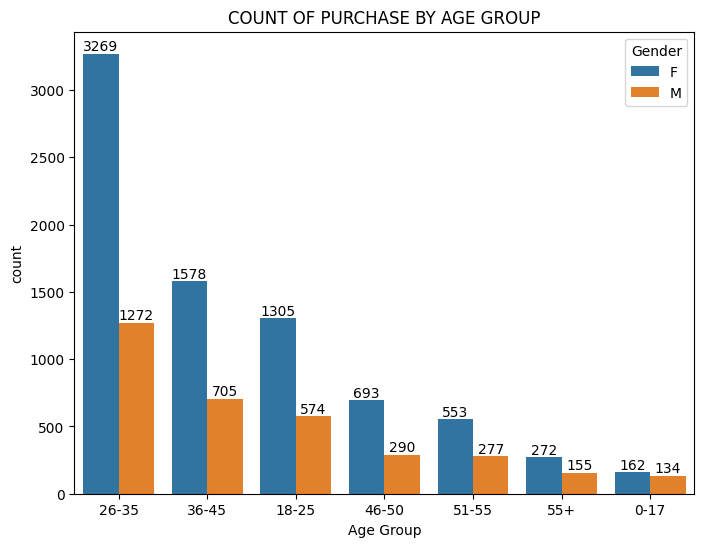

In [ ]:
plt.figure(figsize=(8,6))
ax=sns.countplot(x='Age Group',data=df,hue='Gender',order=df['Age Group'].value_counts().index)
for i in ax.containers:
  ax.bar_label(i)
plt.title('COUNT OF PURCHASE BY AGE GROUP')
plt.show()

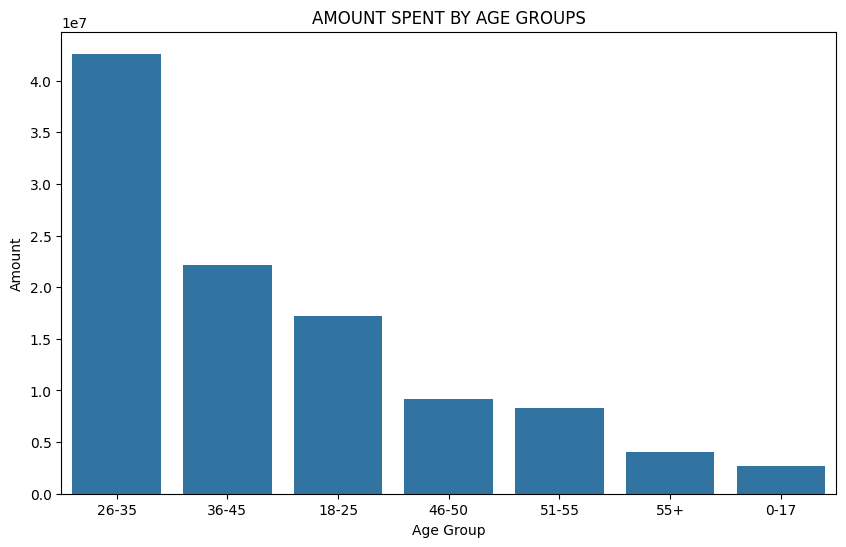

In [ ]:
sales_age=df.groupby('Age Group')[['Amount']].sum().sort_values(by='Amount',ascending=False)
plt.figure(figsize=(10,6))
sns.barplot(x='Age Group',y='Amount',data=sales_age)
plt.title('AMOUNT SPENT BY AGE GROUPS')
plt.show()

It is clear that the age group between 26-36 are the ones who purchase and spent more on products and the least of age 17 and below.

#states

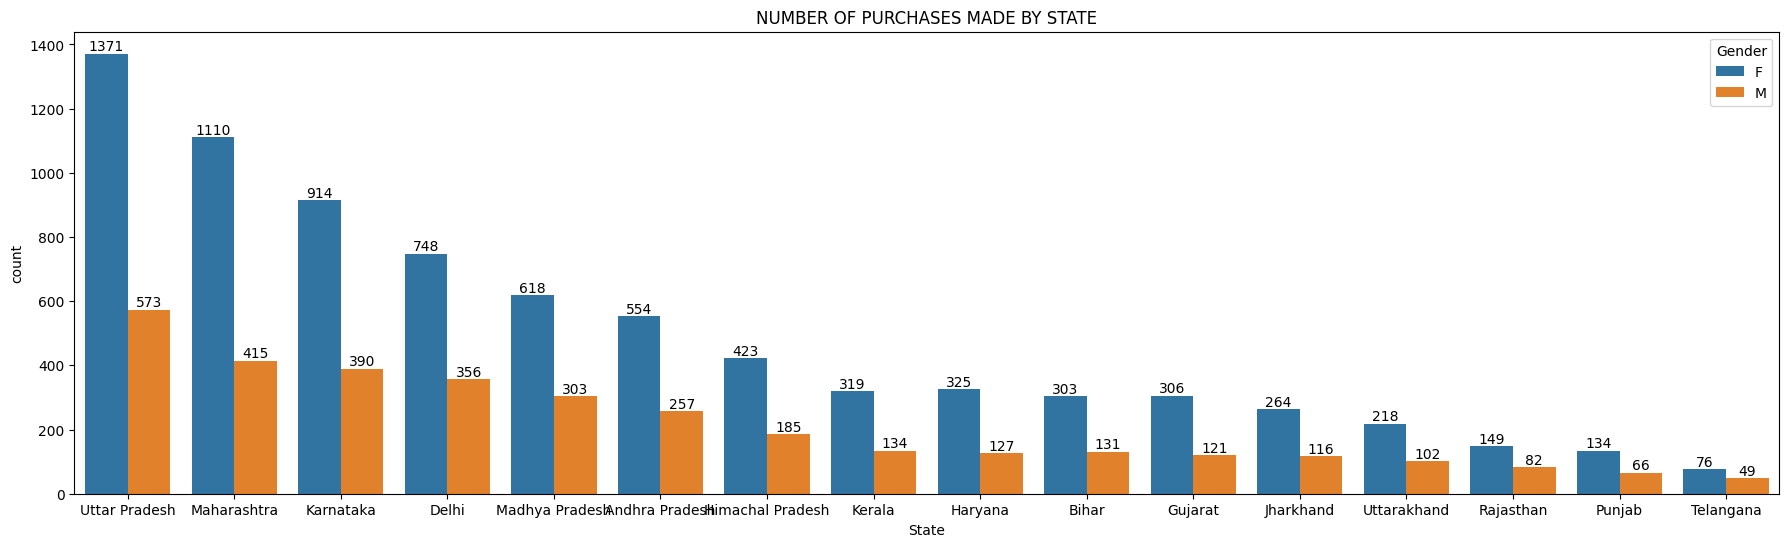

In [ ]:
plt.figure(figsize=(22,6))
ax=sns.countplot(x='State',data=df,hue='Gender',order=df['State'].value_counts().index)
for i in ax.containers:
  ax.bar_label(i)
plt.title('NUMBER OF PURCHASES MADE BY STATE')
plt.show()

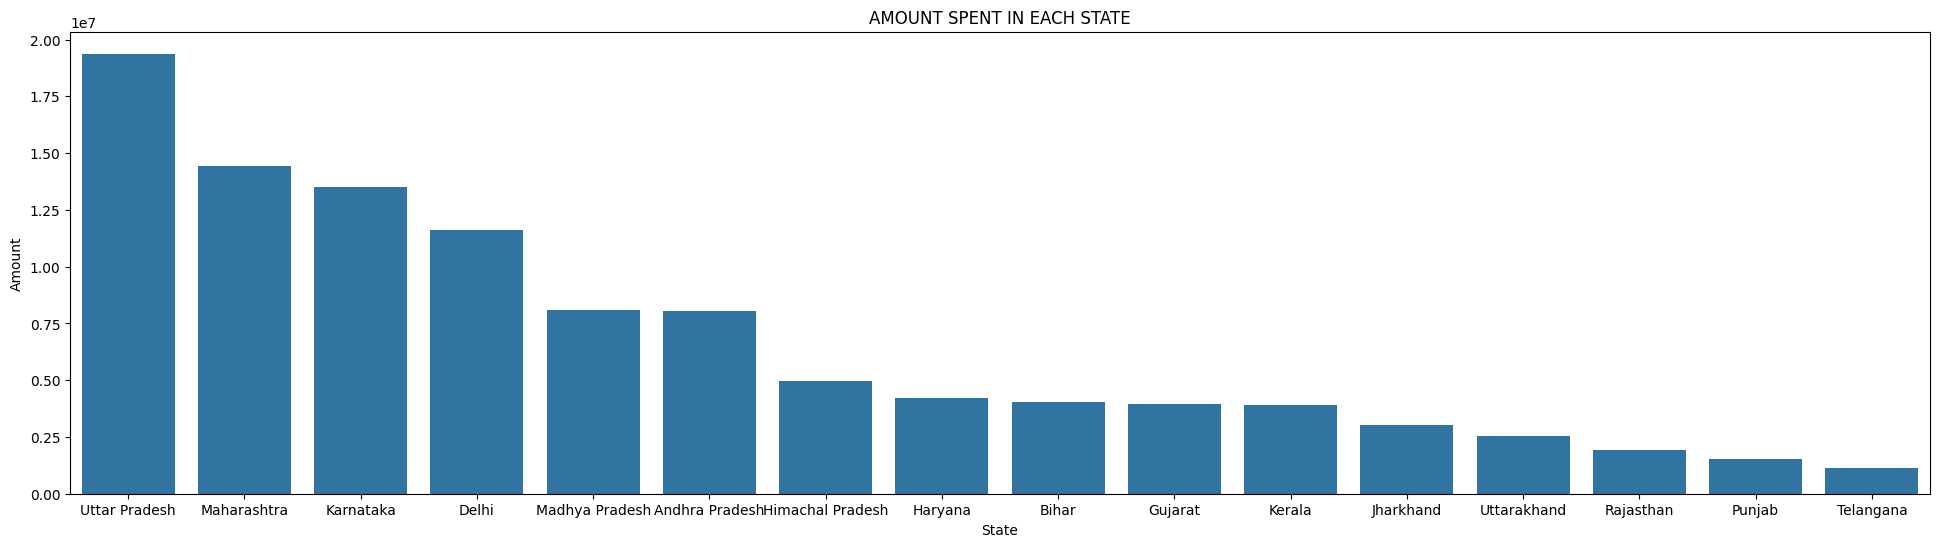

In [ ]:
sales_state=df.groupby('State')[['Amount']].sum().sort_values(by='Amount',ascending=False)
plt.figure(figsize=(24,6))
sns.barplot(x='State',y='Amount',data=sales_state)
plt.title('AMOUNT SPENT IN EACH STATE')
plt.show()

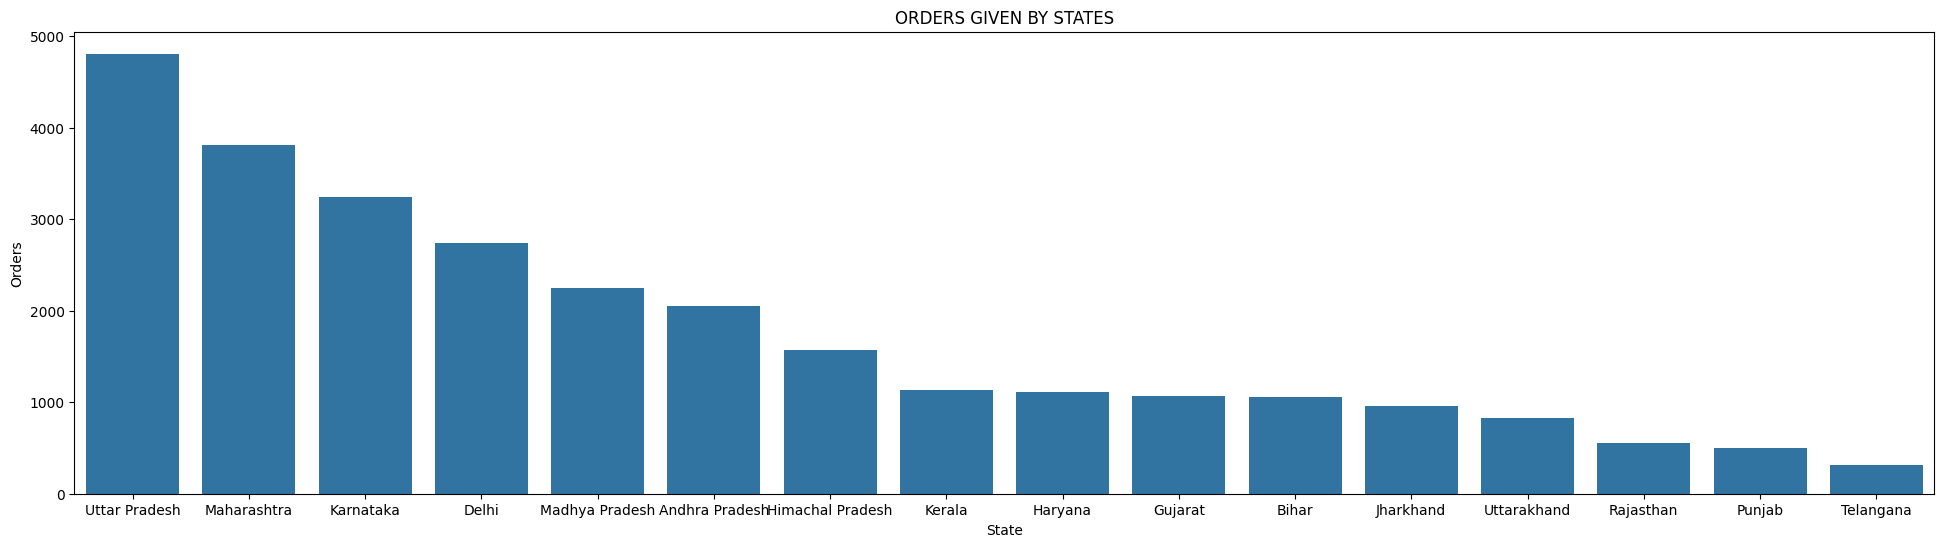

In [ ]:
order_state=df.groupby('State')[['Orders']].sum().sort_values(by='Orders',ascending=False)
plt.figure(figsize=(24,6))
sns.barplot(x='State',y='Orders',data=order_state)
plt.title('ORDERS GIVEN BY STATES')
plt.show()

From these graph we can infer that the number of orders given, the amount spent and the orders given by Uttar Pradesh is more followed by Maharasthra and Karnataka and the least by Telangana followed by Punjab and Rajatsan.

Here, from the graph 'number of purchases made by state' and 'amount spent in each state' we can notice that there is changes in positions of states regarding the amount spent and the purchases made from 8th to 11th position.

But in graph 'Orders given by the state' we can only find the difference in 10th and 11th positions of  states.


#marital status

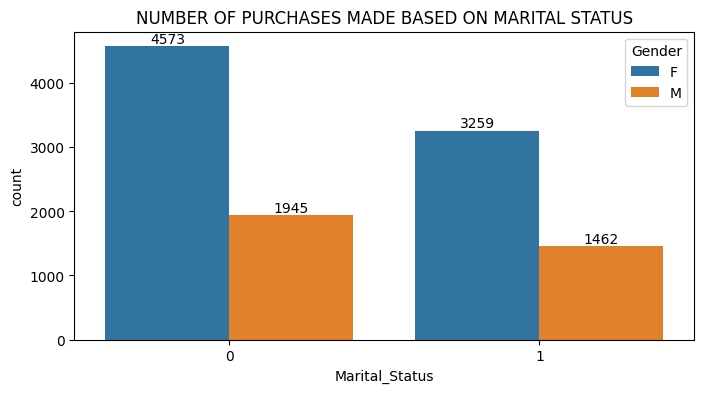

In [ ]:
plt.figure(figsize=(8,4))
ax=sns.countplot(x='Marital_Status',data=df,hue='Gender',order=df['Marital_Status'].value_counts().index)
for i in ax.containers:
  ax.bar_label(i)
plt.title('NUMBER OF PURCHASES MADE BASED ON MARITAL STATUS')
plt.show()

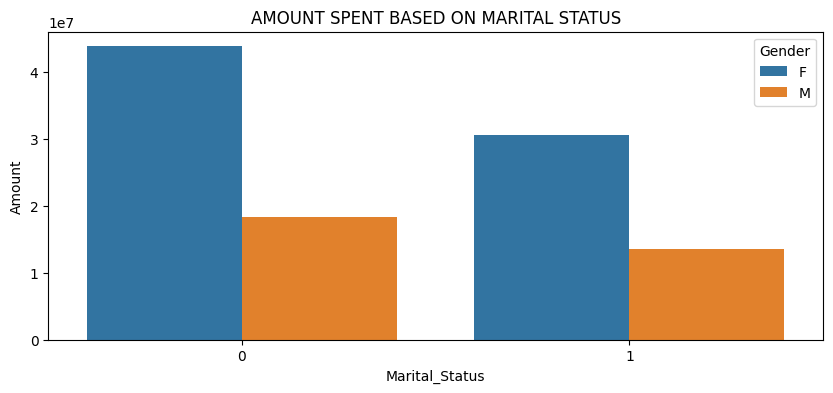

In [ ]:
sales_ms=df.groupby(['Marital_Status','Gender'])[['Amount']].sum().sort_values(by='Amount',ascending=False)
plt.figure(figsize=(10,4))
sns.barplot(x='Marital_Status',y='Amount',data=sales_ms,hue='Gender')
plt.title('AMOUNT SPENT BASED ON MARITAL STATUS')
plt.show()

From these graphs we can notice that the married(women) purchase and spent more on products.

#occupation

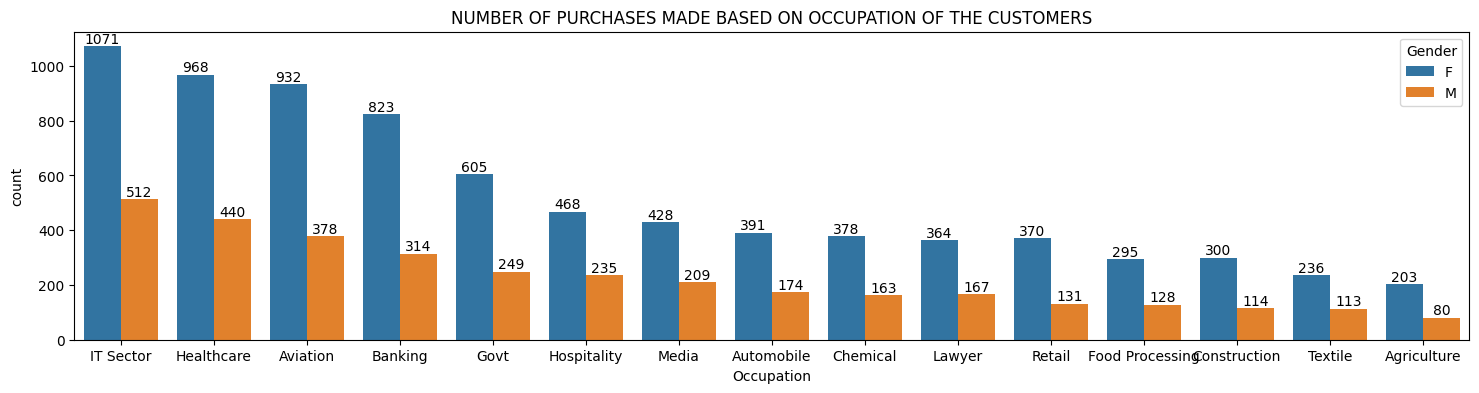

In [ ]:
plt.figure(figsize=(18,4))
ax=sns.countplot(x='Occupation',data=df,hue='Gender',order=df['Occupation'].value_counts().index)
for i in ax.containers:
  ax.bar_label(i)
plt.title('NUMBER OF PURCHASES MADE BASED ON OCCUPATION OF THE CUSTOMERS')
plt.show()

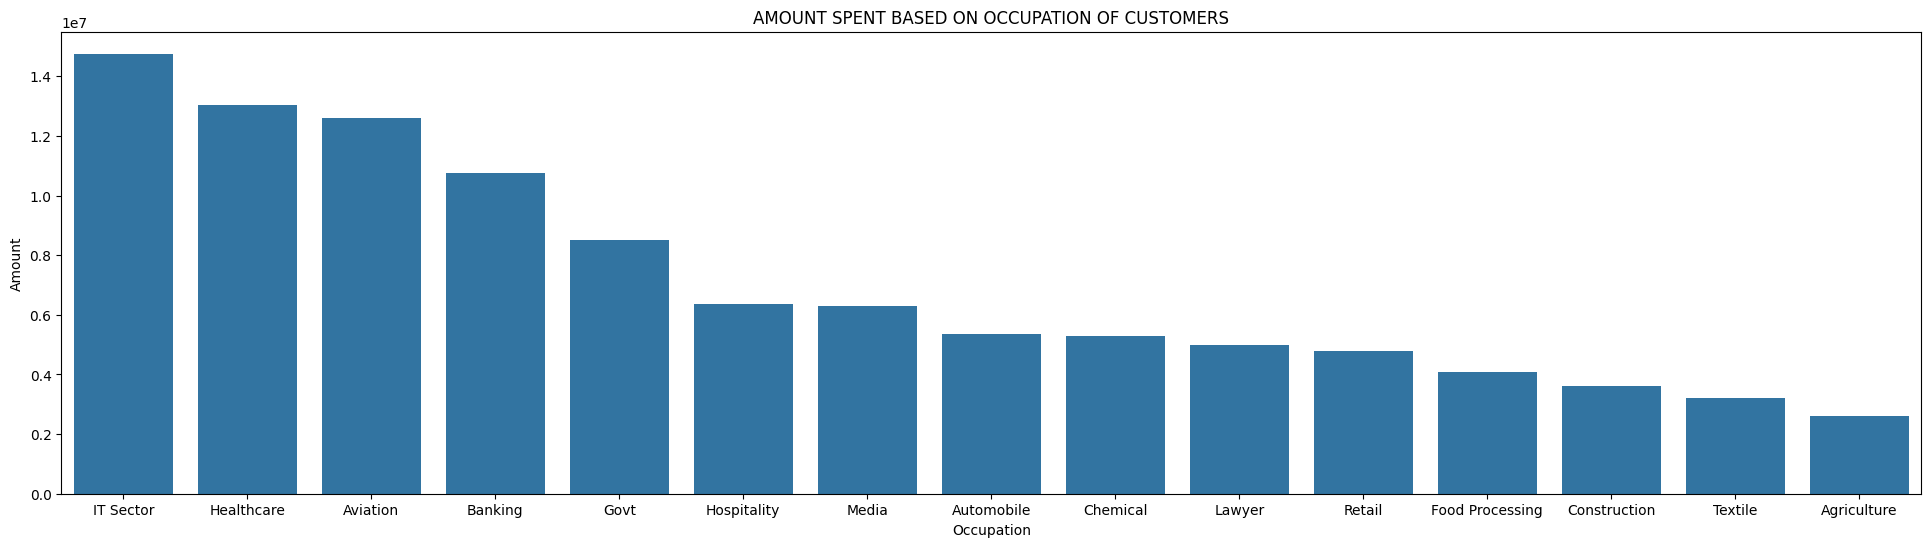

In [ ]:
sales_occ=df.groupby(['Occupation'])[['Amount']].sum().sort_values(by='Amount',ascending=False)
plt.figure(figsize=(24,6))
sns.barplot(x='Occupation',y='Amount',data=sales_occ)
plt.title('AMOUNT SPENT BASED ON OCCUPATION OF CUSTOMERS')
plt.show()

From these two graphs we can understand that the customers from IT sector purchase and spend more on products followed by customers working in healthcare sector and aviation sector and least by agriculture sector followed by textile sector,construction sector.

Here, it is clear that there is a positive relation between the purchases made and the amount spent.

#zone

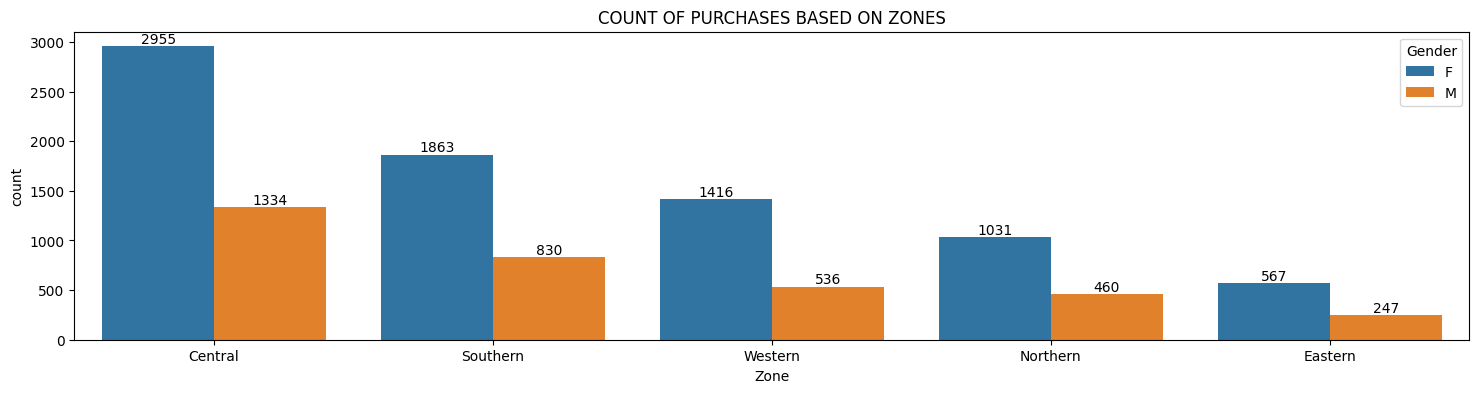

In [ ]:
plt.figure(figsize=(18,4))
ax=sns.countplot(x='Zone',data=df,hue='Gender',order=df['Zone'].value_counts().index)
for i in ax.containers:
  ax.bar_label(i)
plt.title('COUNT OF PURCHASES BASED ON ZONES')
plt.show()

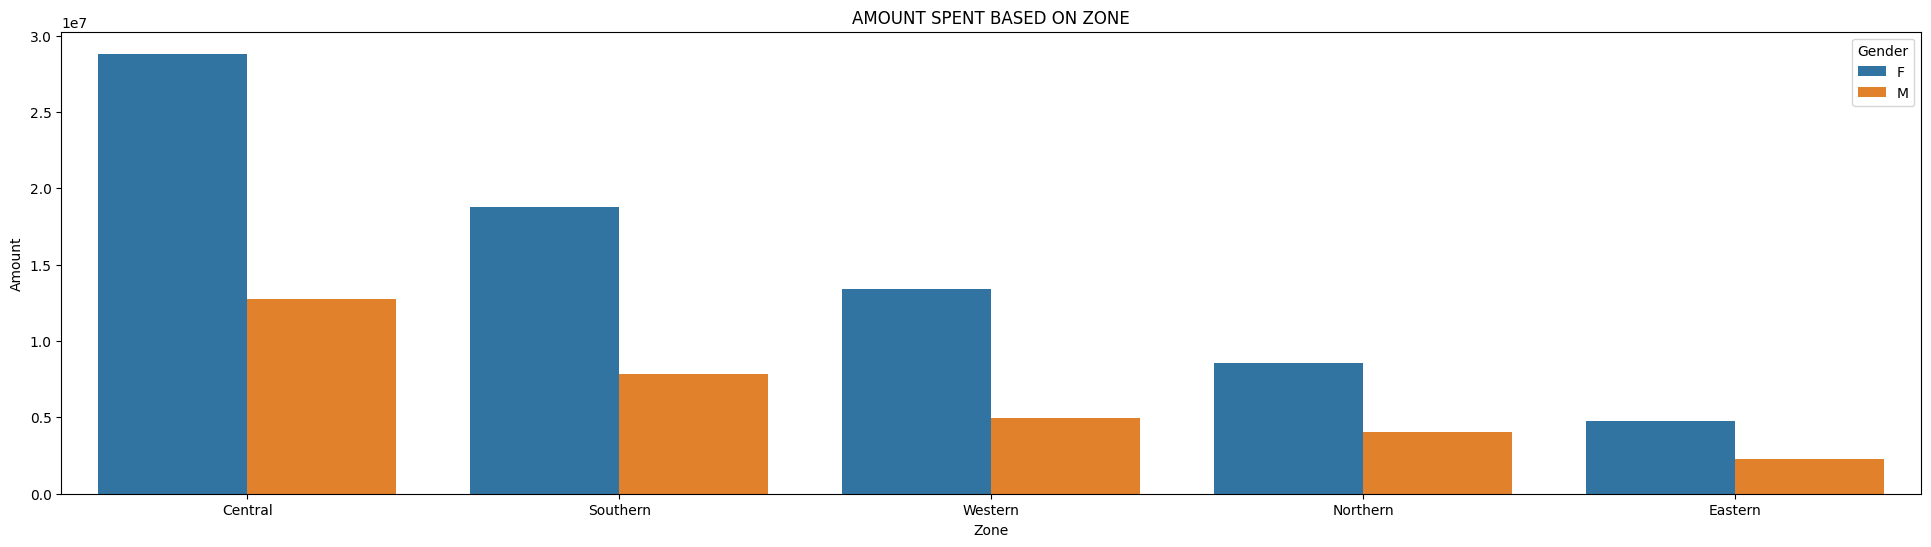

In [ ]:
sales_zone=df.groupby(['Zone','Gender'])[['Amount']].sum().sort_values(by='Amount',ascending=False)
plt.figure(figsize=(24,6))
sns.barplot(x='Zone',y='Amount',hue='Gender',data=sales_zone)
plt.title('AMOUNT SPENT BASED ON ZONE')
plt.show()

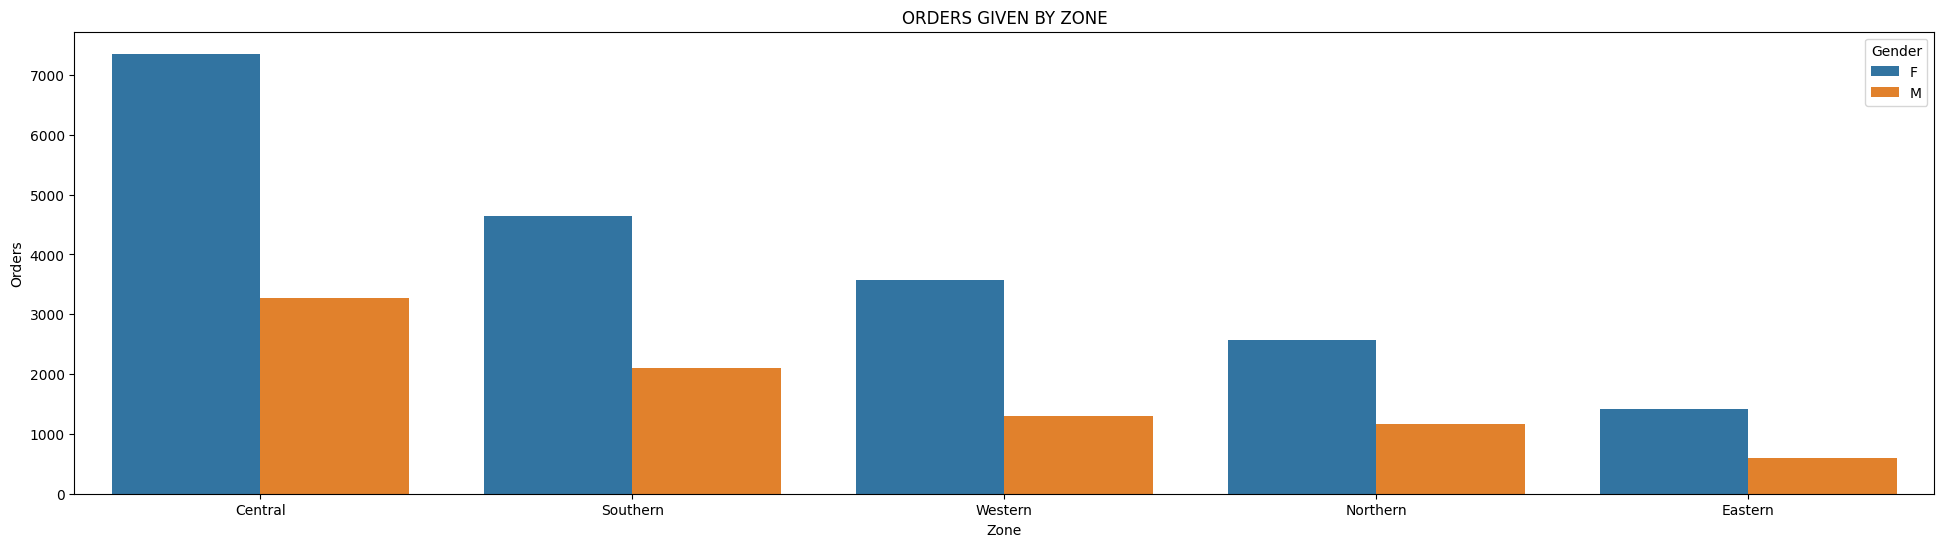

In [ ]:
order_zone=df.groupby(['Zone','Gender'])[['Orders']].sum().sort_values(by='Orders',ascending=False)
plt.figure(figsize=(24,6))
sns.barplot(x='Zone',y='Orders',hue='Gender',data=order_zone)
plt.title('ORDERS GIVEN BY ZONE')
plt.show()

From all these three graphs we can find that the most number of purchases made, amount spent on these purchases and the number of orders given by the zones are on same position (ie.,) Central zone leads the number of purchases made, amount spent and the numbr of orders made followed by southern, western, northern and eastern zones.

#product category

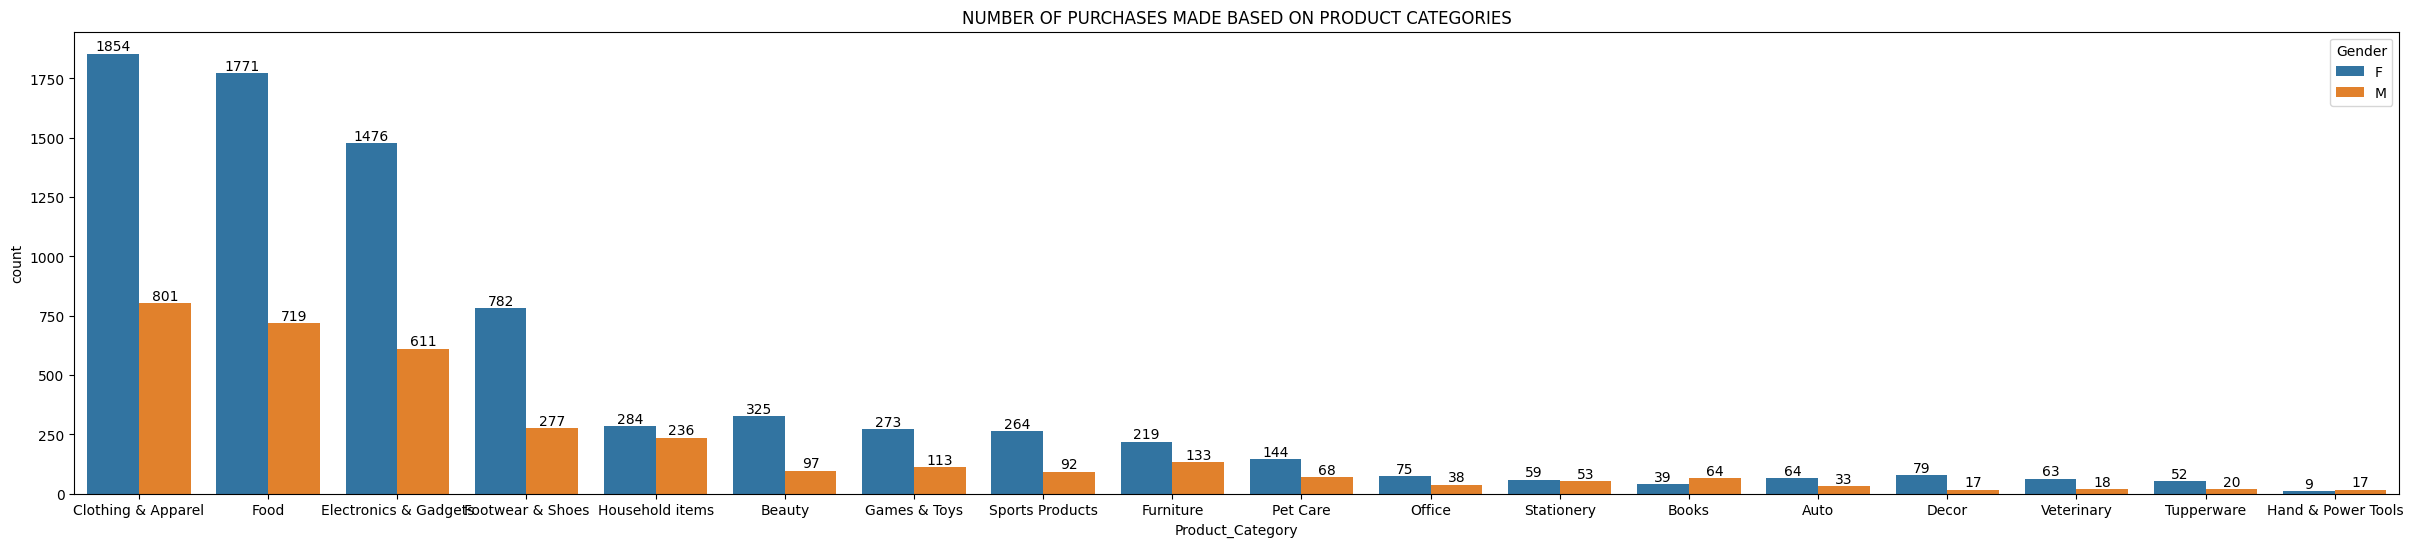

In [ ]:

plt.figure(figsize=(30,6))
ax=sns.countplot(x='Product_Category',data=df,hue='Gender',order=df['Product_Category'].value_counts().index)
for i in ax.containers:
  ax.bar_label(i)
plt.title('NUMBER OF PURCHASES MADE BASED ON PRODUCT CATEGORIES')
plt.show()

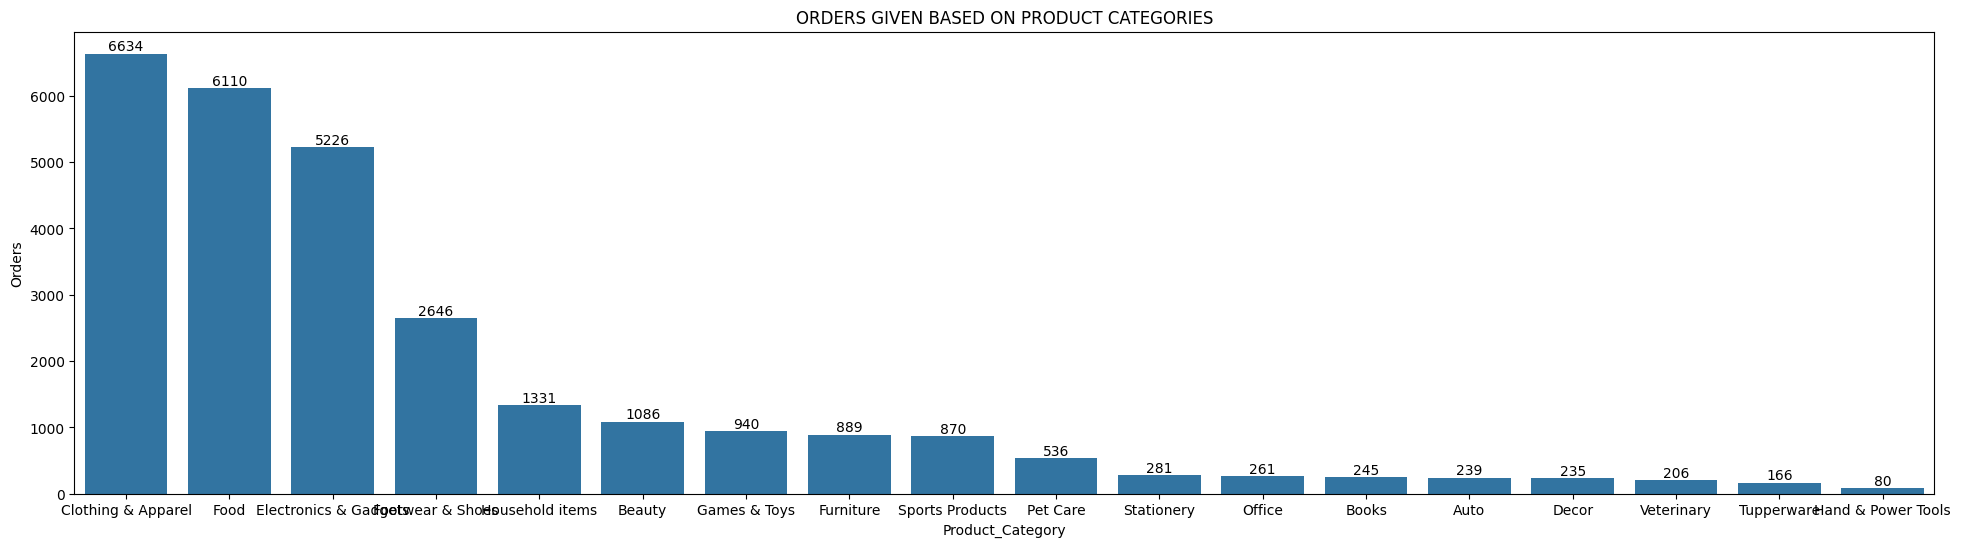

In [ ]:
order_pc=df.groupby(['Product_Category'])[['Orders']].sum().sort_values(by='Orders',ascending=False)
plt.figure(figsize=(24,6))
ax=sns.barplot(x='Product_Category',y='Orders',data=order_pc)
for i in ax.containers:
  ax.bar_label(i)
plt.title('ORDERS GIVEN BASED ON PRODUCT CATEGORIES')
plt.show()

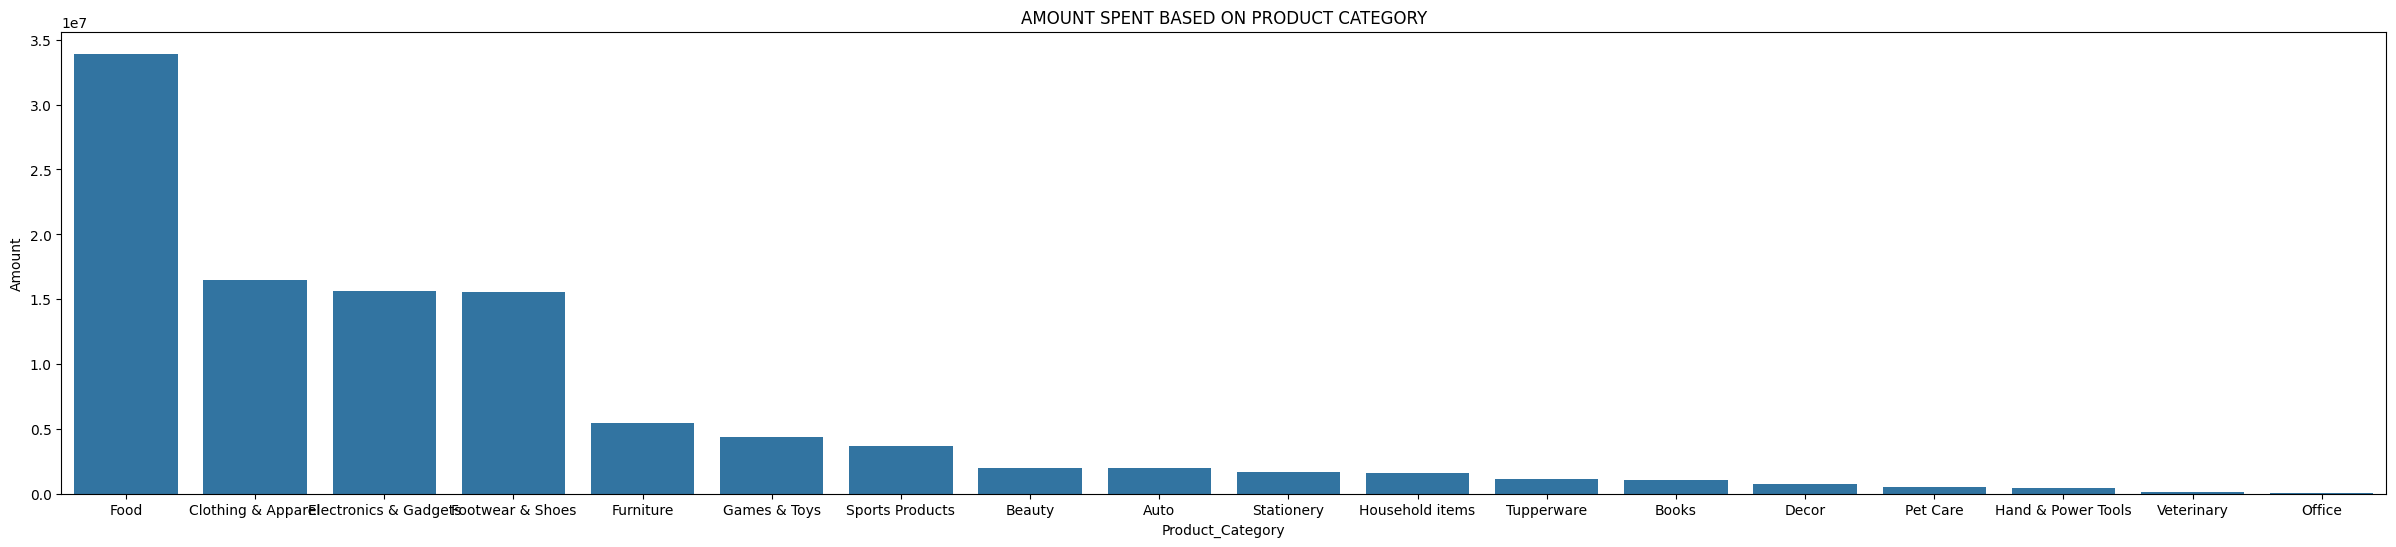

In [ ]:
sales_pc=df.groupby(['Product_Category'])[['Amount']].sum().sort_values(by='Amount',ascending=False)
plt.figure(figsize=(30,6))
sns.barplot(x='Product_Category',y='Amount',data=sales_pc)
plt.title('AMOUNT SPENT BASED ON PRODUCT CATEGORY')
plt.show()

From these graphs we can find that the customers order, spend and purchase more on clothing, electronics and gadgets and food.

We can also notice that even though the purchase and orders of office items are more the revenue from these products are really less.

# most sold products

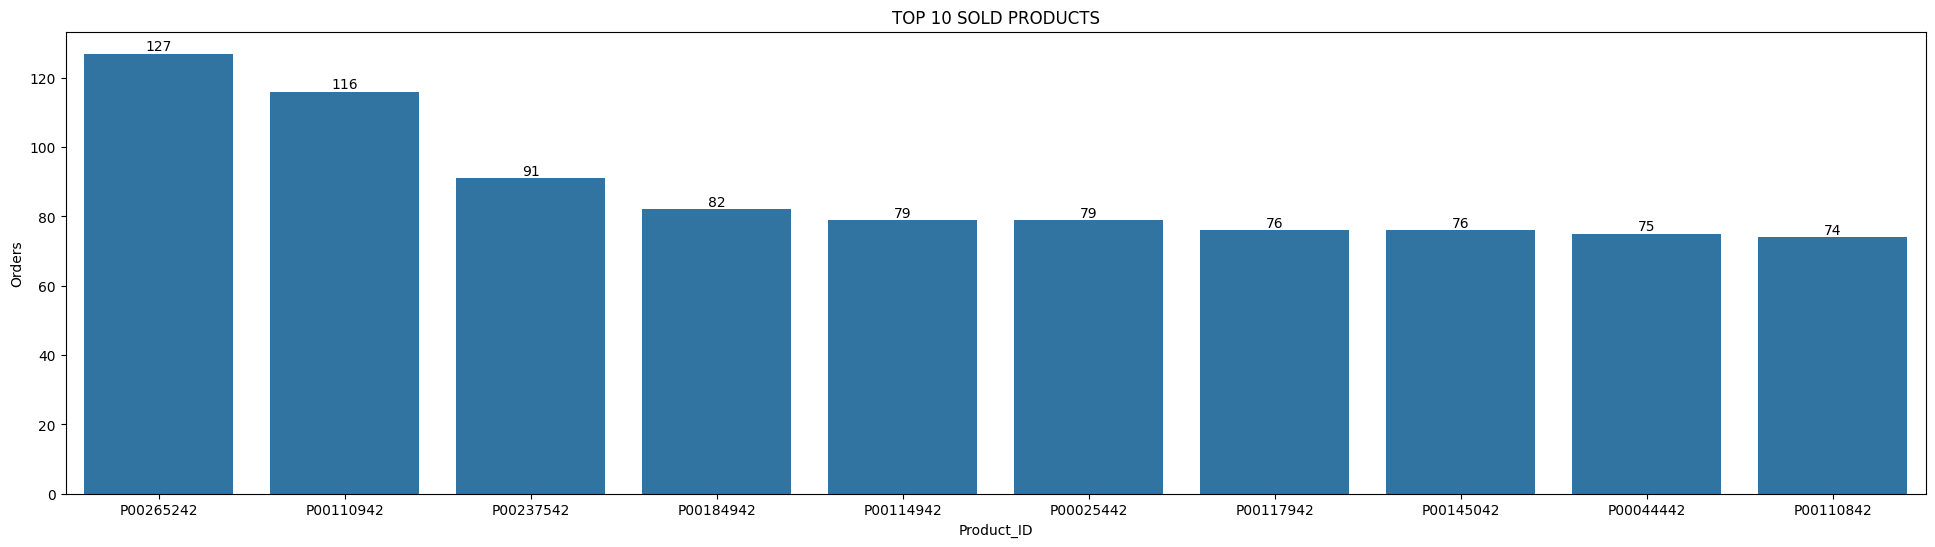

In [ ]:
order_pit=df.groupby(['Product_ID'])[['Orders']].sum().sort_values(by='Orders',ascending=False).head(10)
plt.figure(figsize=(24,6))
ax=sns.barplot(x='Product_ID',y='Orders',data=order_pit)
for i in ax.containers:
  ax.bar_label(i)
plt.title('TOP 10 SOLD PRODUCTS')
plt.show()

The product P00265242 is the most sold product.

# customers with highest and least orders




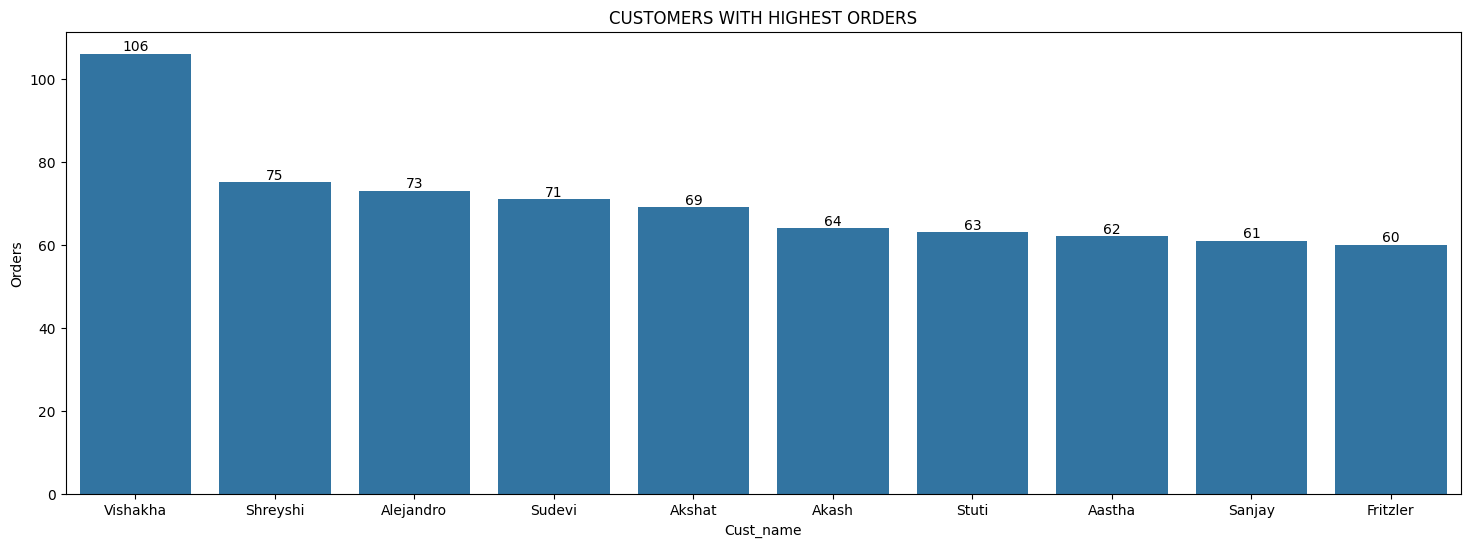

In [ ]:
cust_orders=df.groupby('Cust_name')[['Orders']].sum().sort_values(by='Orders',ascending=False).head(10)
plt.figure(figsize=(18,6))
ax=sns.barplot(x='Cust_name',y='Orders',data=cust_orders)
for i in ax.containers:
  ax.bar_label(i)
plt.title('CUSTOMERS WITH HIGHEST ORDERS')
plt.show()

We can find that Vishaka orders more followed by Shreyshi and Alejandro.

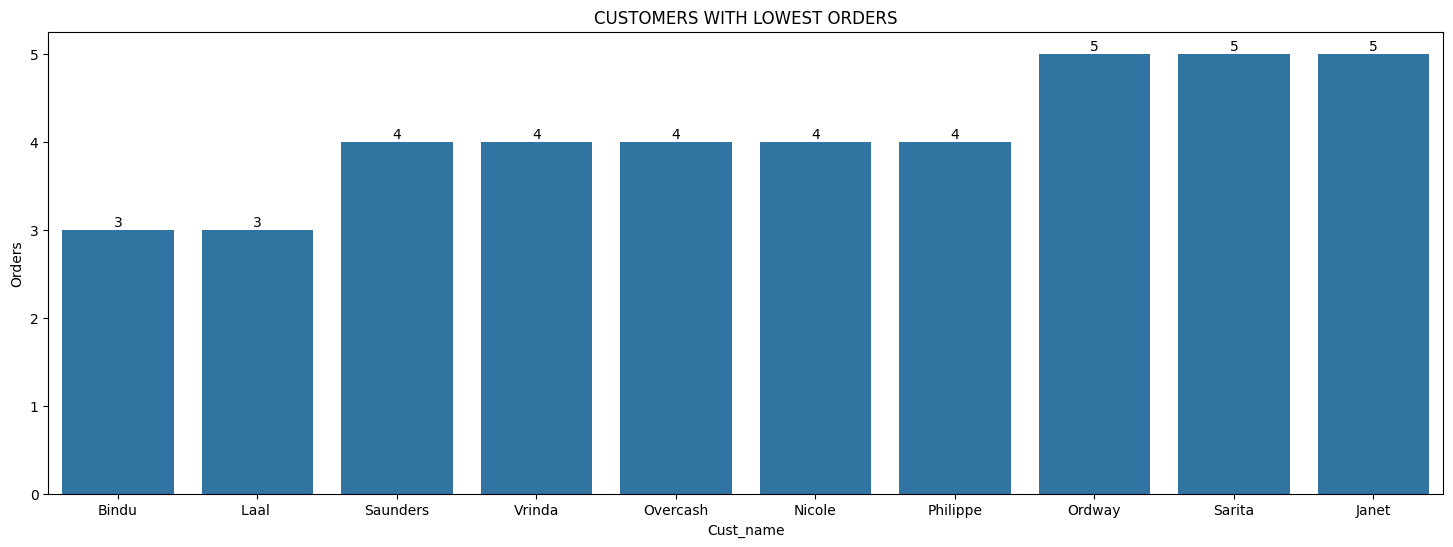

In [ ]:
cust_orders_last=df.groupby('Cust_name')[['Orders']].sum().sort_values(by='Orders',ascending=True).head(10)
plt.figure(figsize=(18,6))
ax=sns.barplot(x='Cust_name',y='Orders',data=cust_orders_last)
for i in ax.containers:
  ax.bar_label(i)
plt.title('CUSTOMERS WITH LOWEST ORDERS')
plt.show()

We can find that Bindu orders leats followed by Laal and Saunders.

# **customers with highest and least purchased amount**

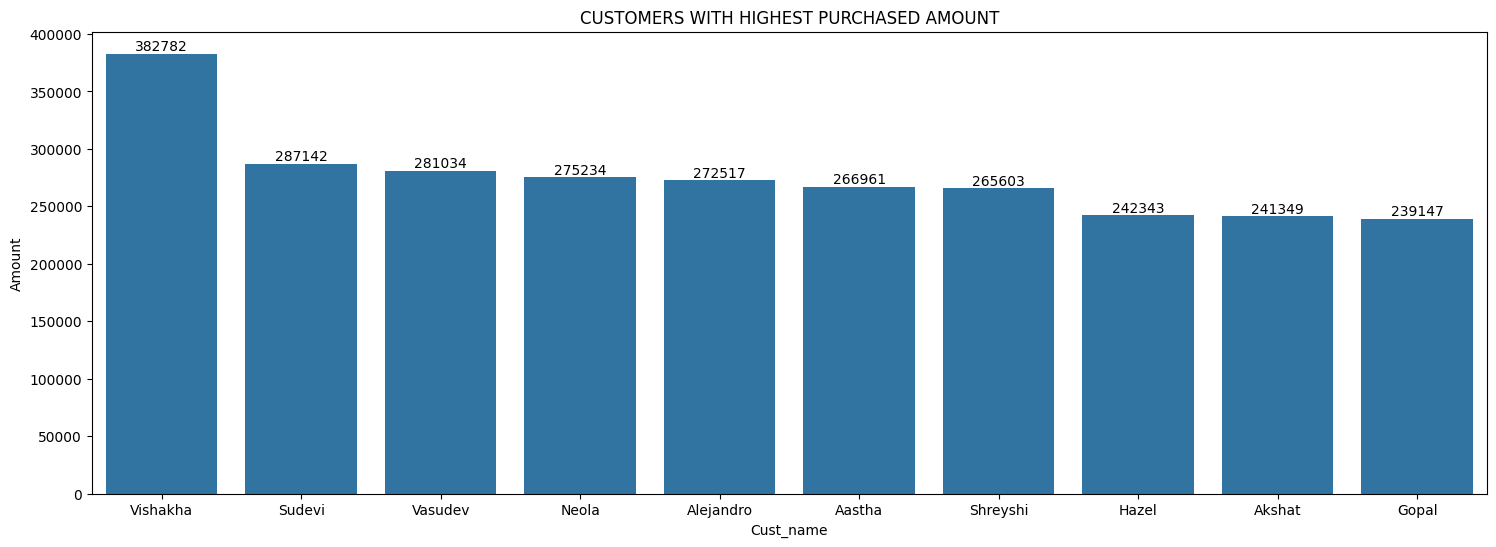

In [ ]:
cust_amt=df.groupby('Cust_name')[['Amount']].sum().sort_values(by='Amount',ascending=False).head(10)
plt.figure(figsize=(18,6))
ax=sns.barplot(x='Cust_name',y='Amount',data=cust_amt)
for i in ax.containers:
  ax.bar_label(i)
plt.title('CUSTOMERS WITH HIGHEST PURCHASED AMOUNT')
plt.show()

We can find that Vishaka spent more followed by Sudevi and Vasudev

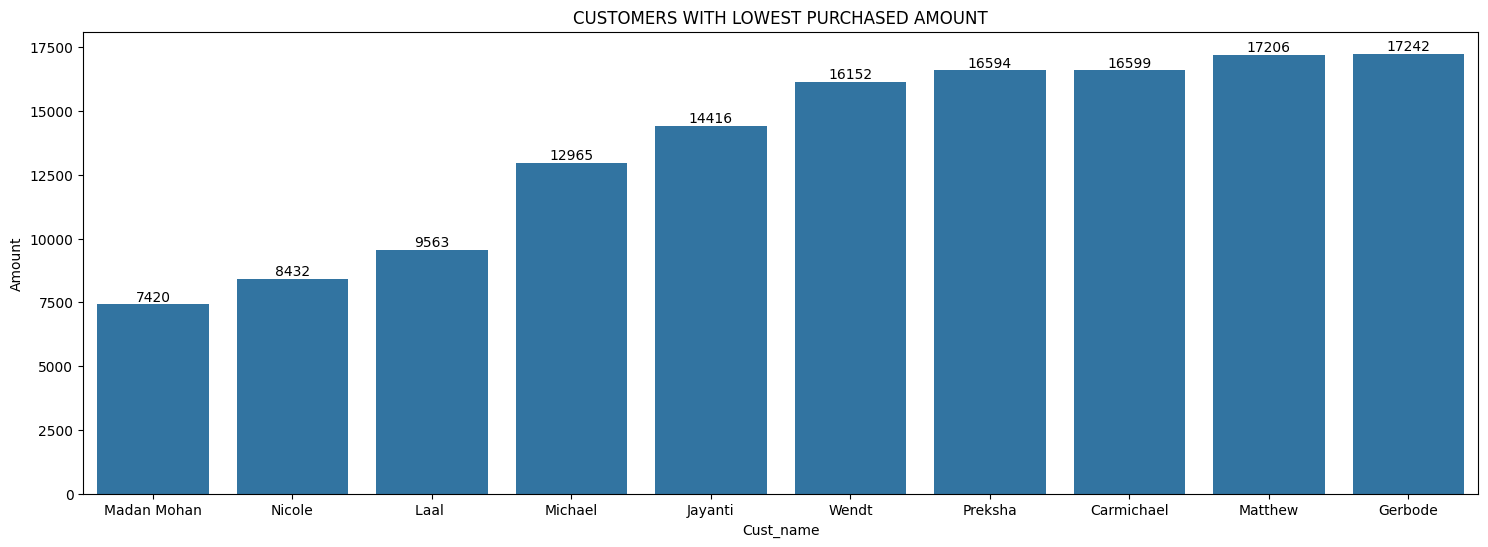

In [ ]:
cust_amt_le=df.groupby('Cust_name')[['Amount']].sum().sort_values(by='Amount',ascending=True).head(10)
plt.figure(figsize=(18,6))
ax=sns.barplot(x='Cust_name',y='Amount',data=cust_amt_le)
for i in ax.containers:
  ax.bar_label(i)
plt.title('CUSTOMERS WITH LOWEST PURCHASED AMOUNT')
plt.show()

We can find that Madan Mohan spent more followed by Nicole and Laal.

# **PRODUCTS SOLD IN EACH ZONES**

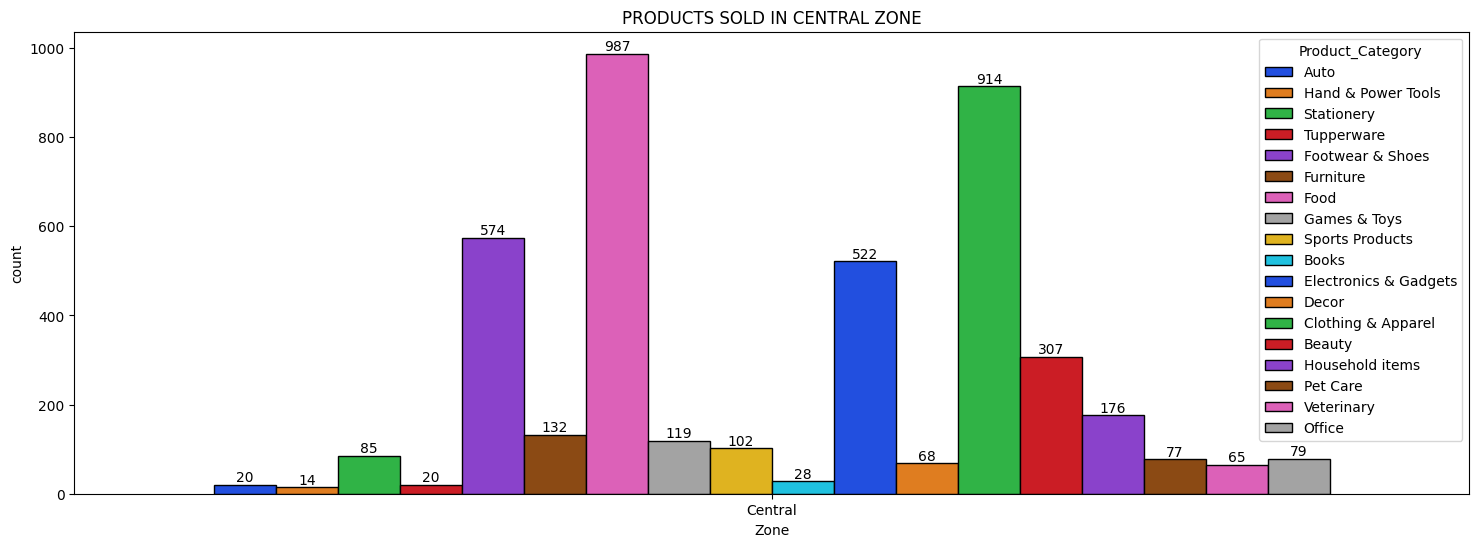

In [ ]:
plt.figure(figsize=(18,6))
ax=sns.countplot(x='Zone',data=df[df['Zone']=='Central'],hue='Product_Category',edgecolor='black',palette='bright')
plt.title('PRODUCTS SOLD IN CENTRAL ZONE')
for i in ax.containers:
  ax.bar_label(i)
plt.show()

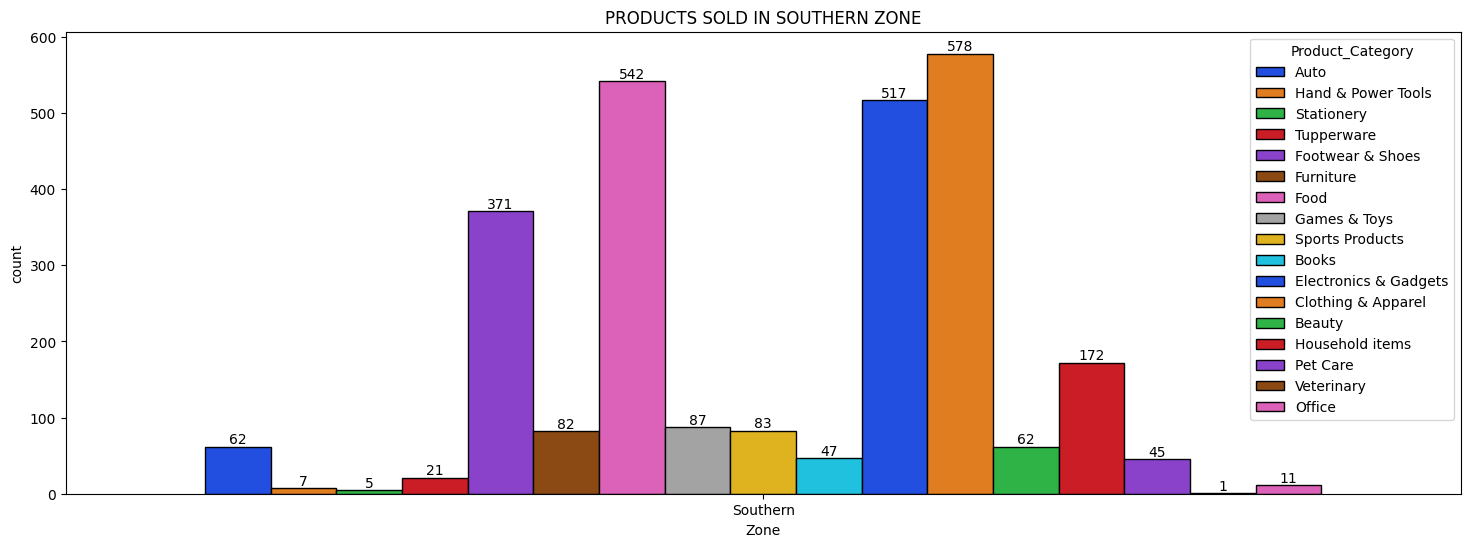

In [ ]:
plt.figure(figsize=(18,6))
ax=sns.countplot(x='Zone',data=df[df['Zone']=='Southern'],hue='Product_Category',edgecolor='black',palette='bright')
plt.title('PRODUCTS SOLD IN SOUTHERN ZONE')
for i in ax.containers:
  ax.bar_label(i)
plt.show()

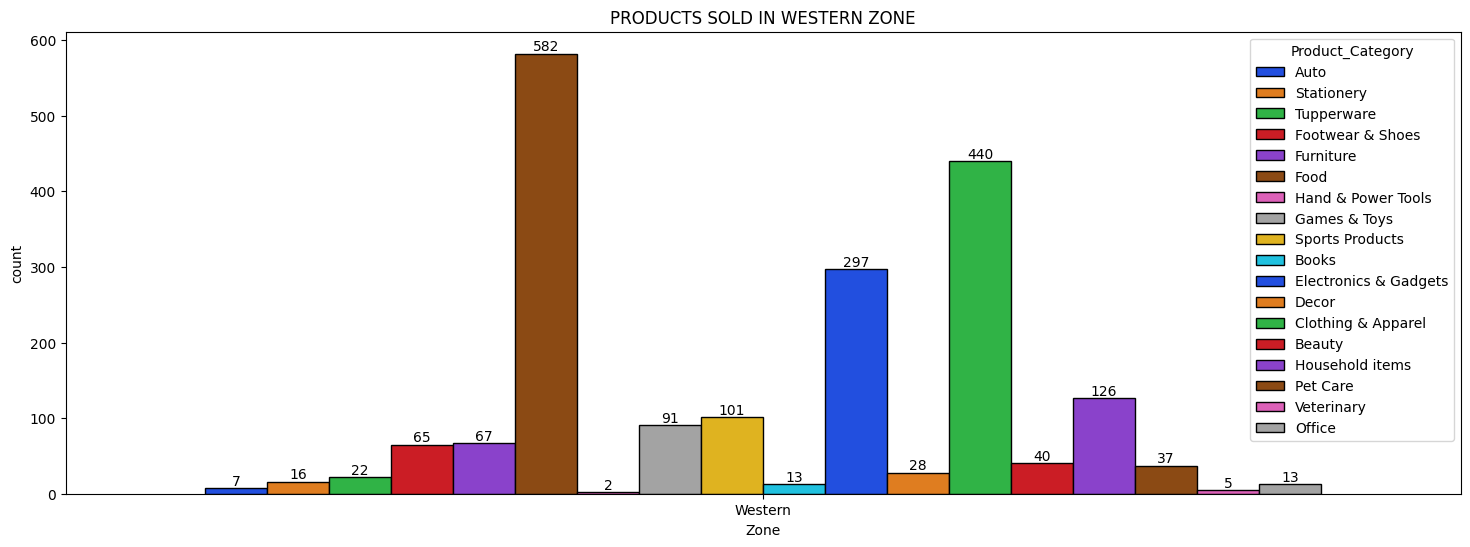

In [ ]:
plt.figure(figsize=(18,6))
ax=sns.countplot(x='Zone',data=df[df['Zone']=='Western'],hue='Product_Category',edgecolor='black',palette='bright')
plt.title('PRODUCTS SOLD IN WESTERN ZONE')
for i in ax.containers:
  ax.bar_label(i)
plt.show()

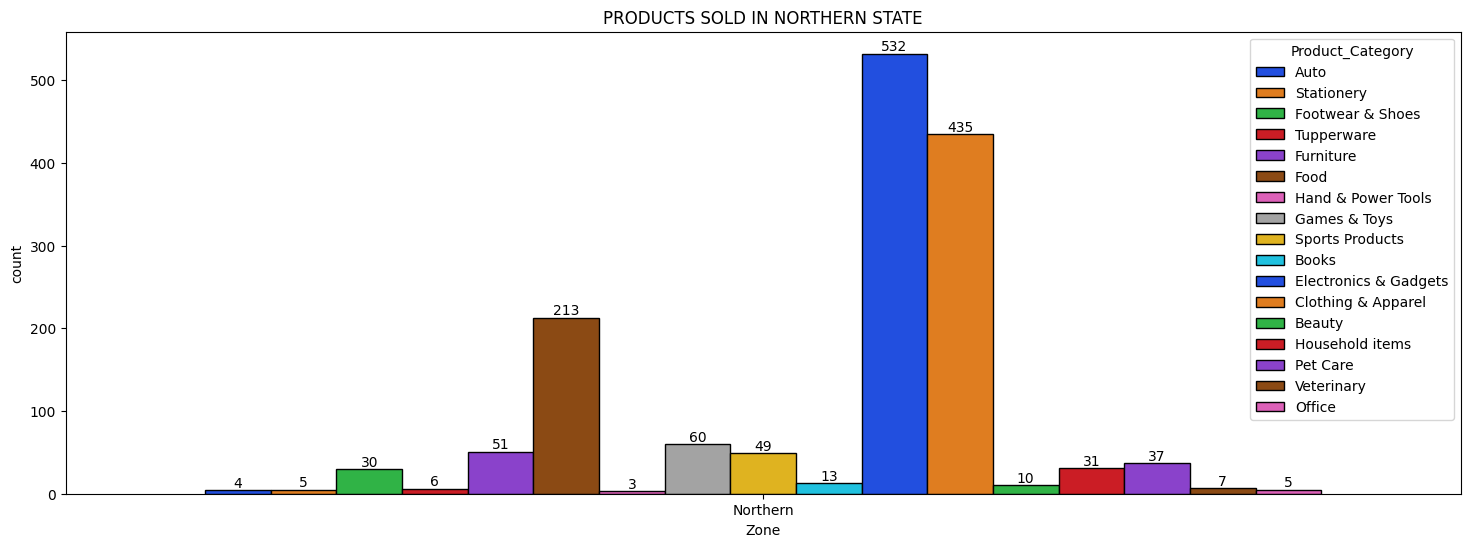

In [ ]:
plt.figure(figsize=(18,6))
ax=sns.countplot(x='Zone',data=df[df['Zone']=='Northern'],hue='Product_Category',edgecolor='black',palette='bright')
plt.title('PRODUCTS SOLD IN NORTHERN STATE')
for i in ax.containers:
  ax.bar_label(i)
plt.show()

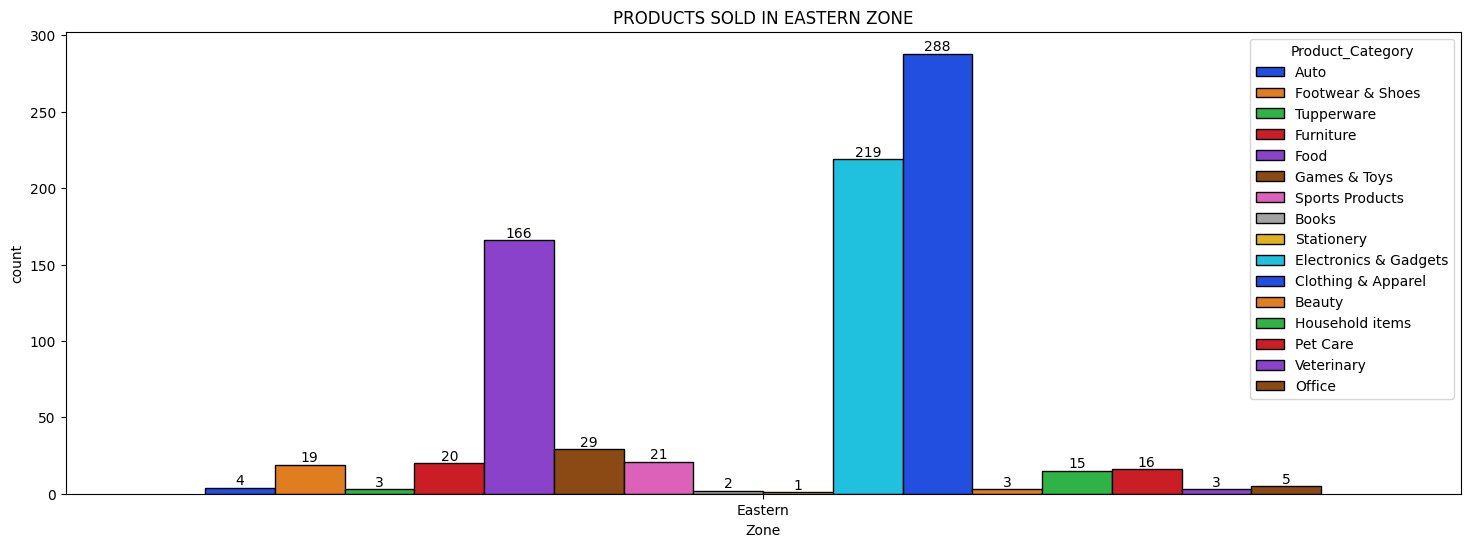

In [ ]:
plt.figure(figsize=(18,6))
ax=sns.countplot(x='Zone',data=df[df['Zone']=='Eastern'],hue='Product_Category',edgecolor='black',palette='bright')
plt.title('PRODUCTS SOLD IN EASTERN ZONE')
for i in ax.containers:
  ax.bar_label(i)
plt.show()

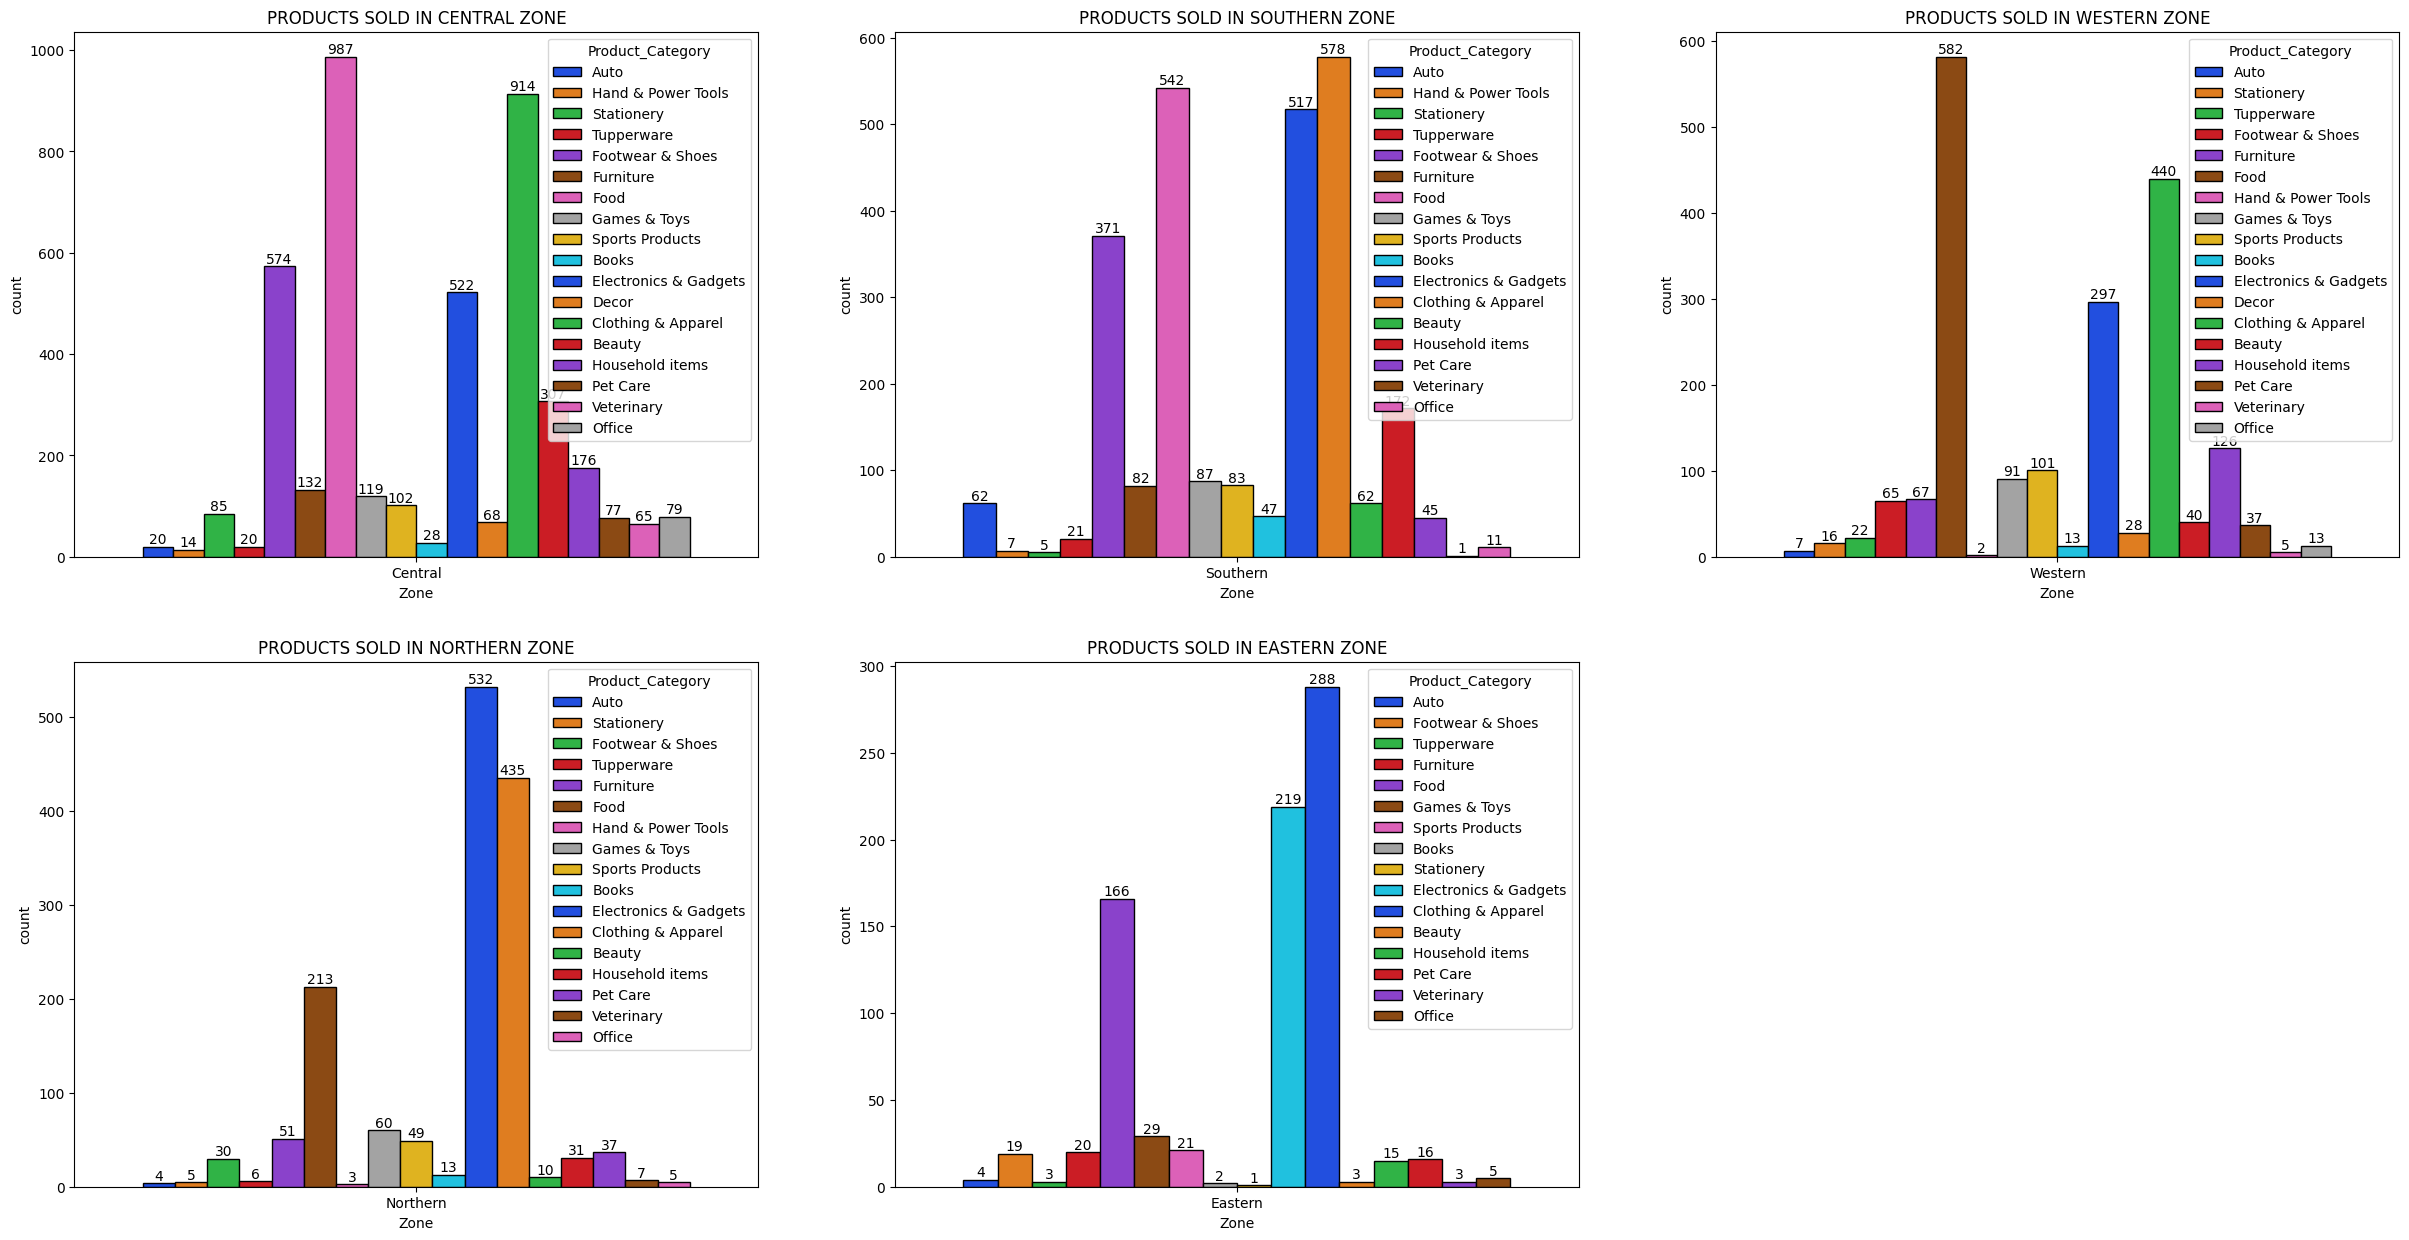

In [ ]:
plt.figure(figsize=(30,15))
plt.subplot(2,3,1)
ax=sns.countplot(x='Zone',data=df[df['Zone']=='Central'],hue='Product_Category',edgecolor='black',palette='bright')
plt.title('PRODUCTS SOLD IN CENTRAL ZONE')
for i in ax.containers:
  ax.bar_label(i)

plt.subplot(2,3,2)
ax=sns.countplot(x='Zone',data=df[df['Zone']=='Southern'],hue='Product_Category',edgecolor='black',palette='bright')
plt.title('PRODUCTS SOLD IN SOUTHERN ZONE')
for i in ax.containers:
  ax.bar_label(i)

plt.subplot(2,3,3)
ax=sns.countplot(x='Zone',data=df[df['Zone']=='Western'],hue='Product_Category',edgecolor='black',palette='bright')
plt.title('PRODUCTS SOLD IN WESTERN ZONE')
for i in ax.containers:
  ax.bar_label(i)

plt.subplot(2,3,4)
ax=sns.countplot(x='Zone',data=df[df['Zone']=='Northern'],hue='Product_Category',edgecolor='black',palette='bright')
plt.title('PRODUCTS SOLD IN NORTHERN ZONE')
for i in ax.containers:
  ax.bar_label(i)

plt.subplot(2,3,5)
ax=sns.countplot(x='Zone',data=df[df['Zone']=='Eastern'],hue='Product_Category',edgecolor='black',palette='bright')
plt.title('PRODUCTS SOLD IN EASTERN ZONE')
for i in ax.containers:
  ax.bar_label(i)


plt.show()

From this graph we can clearly understand that each zone have its own demand on products like:


*   The central zone have more demand on *food* and less demand on *Hand and power tools*.
*  The Southern zone have more demand on *clothing and apparel* and less demand on *hand and power tools, veterinary, stationery, office*.
*  The western zone have more demand on *food* and less demand on products like *hand and power tools, veterinary, stationery, office, auto*.
*  The norhtern zone have more demand on *auto* and less demand for most of the other products.
*  The eastern zone also have more demand on *auto* and less demand on most of the other products and we can also notice that there is no sale of *hand and power tools*.
  
  The central and westen zone have more demand on food while the northern and eastern zones have more demand on auto.


# **CONCLUSION**



1.   Based on the given data we can find that the married women of age between 26-35 from state Uttar Pradesh(Central Zone) spent more especially with the products like clothing & apparel and food.
2. Here, we can notice that the numbers of orders given are not proportional to the number of purchases made. In most cases the purchases are less than that of orders.
3. We can find the most number of purchases are from central states like uttar pradesh and maharashtra while the eastern and southern states of india have purchased less. Thus we can find a need to increase the sales in these areas to increase the profits.
4. The number of purchases made and the amount spent on these purchases are not proportional. This can be due to the change in prices of these products.
5. Each zone have its own demand as one can be the most demanded in one zone can be the least demanded in another zone.
6. From these graphs we can notice that the least demanded product is *hand and power tools* which can be seen by taking zones alone into consideration and all together.
7. Customers like laal and nicole have ordered and spent less.




# **SUGGESTIONS**


1. As we found out that the number of orders given and the amount of purchases made are not proportional, there is  need to decrease the amount of cancellation of these orders to increase the profits. Promotion of products, better marketing and pricing strategies can be made to increase the purchases.

2. As we ascertained that *hand and power tools* are least in demand. So as to improve the situation, it can be replaced by alternative products that serve similar customer needs or by better inventory management.
3. As stated in the above graphs the office items are being purchased and ordered more but the revenue is comparitively really less. So in order to increase the revenue, reviewing the price strategy can be done.
4. As the product P00265242 and P00110942 are in high demand, it is suggested to maintain the stock so as it doen't run out of stock.
5. As there are some customers who have ordered and spent less, gathering customer feedback can be helpful to understand the reason for thier low spending, loyalty credit programs can be provided(points can be provided for repeated purchases) etc.,.


